In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [2]:
usdInr = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/USDINR.csv')
usdInr.drop('Unnamed: 0', axis=1, inplace=True)
usdInr.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR,61.610101,61.341917,61.393506,61.400000,61.400000,61.400000,0.0,0.000000,0.000000,0.000000,61.7496,62.164424,61.334776
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR,61.627339,61.332157,61.493596,61.403725,61.401881,61.400945,0.0,0.007578,0.001516,0.006063,61.7496,62.164424,61.334776
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR,61.547724,61.499491,61.516284,61.407815,61.403983,61.402010,0.0,0.014466,0.004106,0.010361,61.7496,62.164424,61.334776
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR,61.567341,61.356586,61.504031,61.407155,61.403725,61.401901,0.0,0.010365,0.005358,0.005007,61.7496,62.164424,61.334776
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR,61.633775,61.348468,61.385332,61.413345,61.406919,61.403524,0.0,0.020914,0.008469,0.012445,61.7496,62.164424,61.334776


In [3]:
X = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/X_USDINR.csv')
X.drop('Unnamed: 0', axis=1, inplace=True)
X.head()

,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,0.002716,0.004312,0.002460,0.000000,0.000000,0.000000,0.0,0.435743,0.428316,0.501290,0.001107,0.000439,0.029707
1,0.003467,0.003890,0.006787,0.000164,0.000083,0.000042,0.0,0.440006,0.429330,0.511641,0.001107,0.000439,0.029707
2,0.000000,0.011124,0.007768,0.000344,0.000177,0.000090,0.0,0.443880,0.431063,0.518980,0.001107,0.000439,0.029707
3,0.000854,0.004946,0.007238,0.000315,0.000165,0.000085,0.0,0.441573,0.431901,0.509839,0.001107,0.000439,0.029707
4,0.003747,0.004596,0.002107,0.000587,0.000307,0.000158,0.0,0.447507,0.433982,0.522539,0.001107,0.000439,0.029707


In [4]:
y = pd.read_csv(r'C:/Users/uzmap/Documents/GitHub/ForEx/USDINR/Y_USDINR.csv')
y.drop('Unnamed: 0', axis=1, inplace=True)
y.head()

,Closing_price
0,61.400
1,61.495
2,61.508
3,61.391
4,61.565


Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0304 - mae: 0.1275 - val_loss: 0.0012 - val_mae: 0.0285
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mae: 0.0466 - val_loss: 0.0016 - val_mae: 0.0339
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mae: 0.0376 - val_loss: 0.0022 - val_mae: 0.0401
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mae: 0.0325 - val_loss: 0.0056 - val_mae: 0.0641
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0302 - val_loss: 0.0064 - val_mae: 0.0675
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0275 - val_loss: 0.0036 - val_mae: 0.0528
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0271 - val_loss: 0.0072 - val_mae: 0.0740
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 0.0077 - val_mae: 0.0756
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8054e-04 - mae: 0.0226 

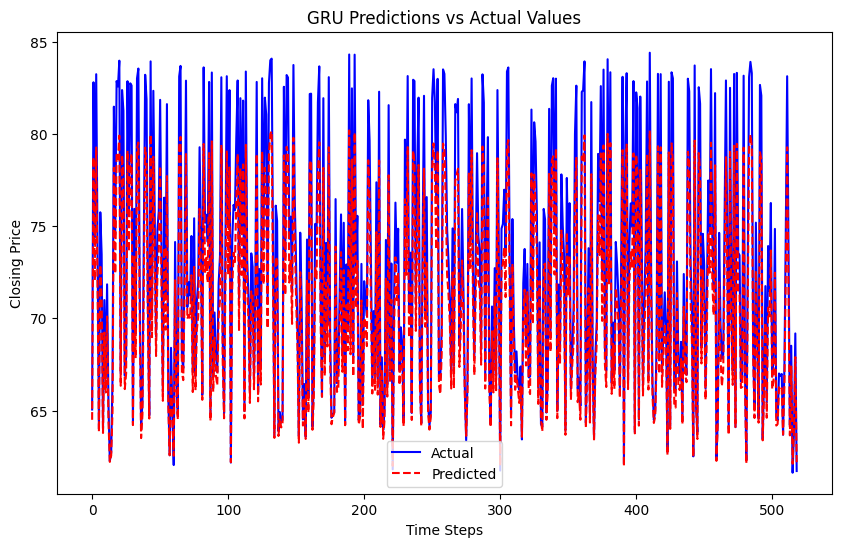

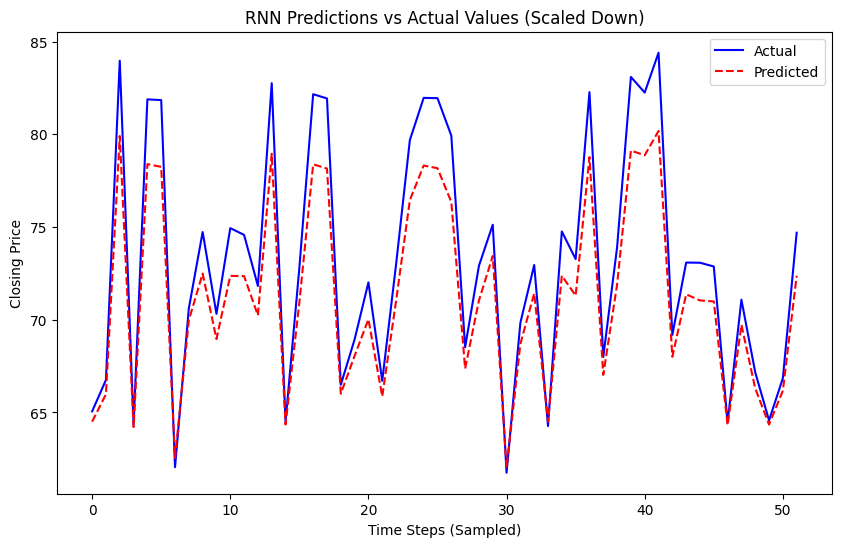

In [5]:
def gru_model(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build GRU model
    gru_model = Sequential([
        GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
        Dropout(0.2),  # Regularization
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = gru_model.evaluate(X_train, y_train)
    test_loss, test_mae = gru_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_gru = gru_model.predict(X_test)
    y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_gru_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_gru_rescaled)

    gru_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("GRU Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_gru_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Scaled Down)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return gru_metrics

gru_metrics_df = gru_model(usdInr)

In [6]:
gru_metrics_df

,Metric,Value
0,MAE,1.940468
1,MSE,5.521165
2,MAPE,0.025225
3,R2,0.878473


In [7]:
def grid_search_gru(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Define the grid of hyperparameters to search over
    param_grid = {
        'units': [32, 64, 128],
        'dropout_rate': [0.2, 0.3],
        'activation': ['relu', 'tanh'],
        'batch_size': [16, 32, 64],
        'epochs': [10, 20],
    }

    best_model = None
    best_r2 = -np.inf  # To store the best R2 score
    best_params = None

    # Grid search loop
    for params in ParameterGrid(param_grid):
        print(f"Testing combination: {params}")

        # Build the GRU model with the current set of hyperparameters
        model = Sequential([
            GRU(params['units'], activation=params['activation'], input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
            Dropout(params['dropout_rate']),
            Dense(32, activation=params['activation']),
            Dense(1)
        ])

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

        # Train the model
        model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_test, y_test), verbose=0)

        # Evaluate the model
        train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
        y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

        r2 = r2_score(y_test_rescaled, y_pred_rescaled)

        # Check if this combination of hyperparameters produces the best R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_model = model
            best_params = params

        print(f"R2: {r2:.4f}")

    print(f"Best R2: {best_r2:.4f}")
    print(f"Best parameters: {best_params}")

    # Return the best model and parameters
    return best_model, best_params

# Run the grid search for GRU hyperparameters
best_gru_model, best_gru_params = grid_search_gru(usdInr)

Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9096
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9160
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8774
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8434
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9174
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9584
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.7144
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
R2: 0.7395
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9488
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.7103
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8072
Testing combination: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8244
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8629
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9264
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9707
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.8930
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8864
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9816
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.6986
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.8368
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9456
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7859
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.6979
Testing combination: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2: 0.8539
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.8944
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9411
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9804
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8789
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9080
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9207
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.7212
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8135
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
R2: 0.9253
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.7910
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.8696
Testing combination: {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2: 0.9184
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9961
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9970
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9983
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9916
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9985
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9981
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9940
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R2: 0.9923
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9977
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9958
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9974
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9947
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9977
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9982
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9977
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9974
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9981
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R2: 0.9916
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9978
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9936
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
R2: 0.9972
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9977
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9985
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9811
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R2: 0.9962
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9979
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
R2: 0.9911
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
R2: 0.9967
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9985
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9964
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R2: 0.9962
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 10, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2: 0.9972
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 32}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2: 0.9967
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 64}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9960
Testing combination: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'units': 128}


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2: 0.9967
Best R2: 0.9985
Best parameters: {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.2, 'epochs': 20, 'units': 128}


In [8]:
best_gru_params

{'activation': 'tanh',
 'batch_size': 64,
 'dropout_rate': 0.2,
 'epochs': 20,
 'units': 128}

Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0231 - mae: 0.1131 - val_loss: 0.0012 - val_mae: 0.0310
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0043 - mae: 0.0509 - val_loss: 9.4364e-04 - val_mae: 0.0239
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0030 - mae: 0.0412 - val_loss: 1.9689e-04 - val_mae: 0.0106
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 2.5821e-04 - val_mae: 0.0124
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 1.8118e-04 - val_mae: 0.0098
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013 - mae: 0.0278 - val_loss: 2.5213e-04 - val_mae: 0.0122
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012 - mae: 0.0261 - val_loss: 2.4329e-04 - val_mae: 0.0127
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - mae: 0.0248 - val_loss: 2.7536e-04 - val_mae: 0.0130
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/s

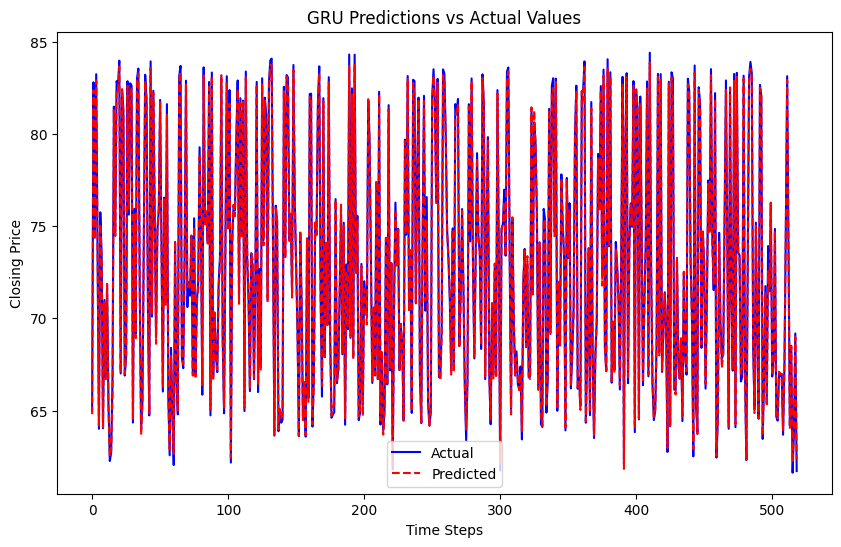

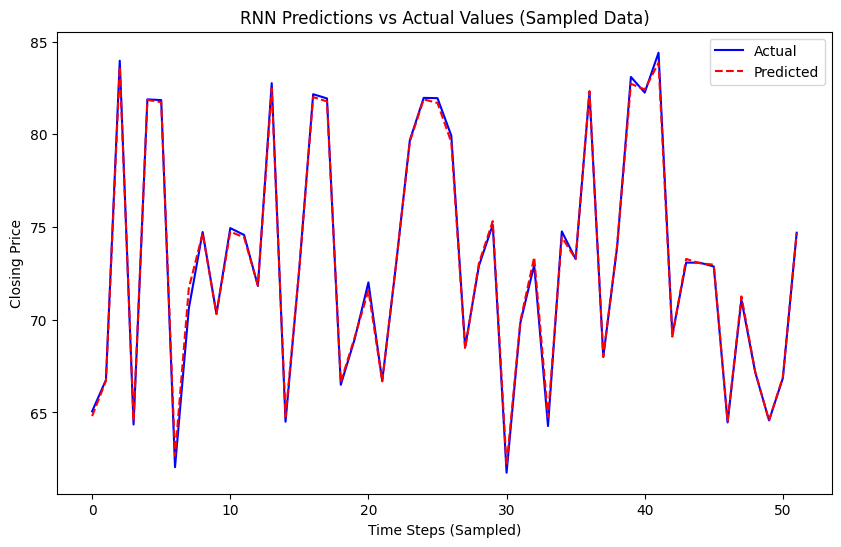

In [9]:
def gru_model_with_best_params(usdInr, best_params):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build the GRU model using the best parameters
    gru_model = Sequential([
        GRU(best_params['units'], activation=best_params['activation'], input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
        Dropout(best_params['dropout_rate']),  # Regularization
        Dense(32, activation=best_params['activation']),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    gru_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = gru_model.evaluate(X_train, y_train)
    test_loss, test_mae = gru_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_gru = gru_model.predict(X_test)
    y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    mae = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_gru_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_gru_rescaled)

    gru_withBestParams_metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("GRU Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Sampled plot for clarity (optional)
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_gru_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Sampled Data)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return gru_withBestParams_metrics

# Run the GRU model with the best parameters
gru_metrics_withBestParams_df = gru_model_with_best_params(usdInr, best_gru_params)

In [10]:
gru_metrics_df

,Metric,Value
0,MAE,1.940468
1,MSE,5.521165
2,MAPE,0.025225
3,R2,0.878473


In [11]:
gru_metrics_withBestParams_df

,Metric,Value
0,MAE,0.226826
1,MSE,0.087276
2,MAPE,0.003102
3,R2,0.998079
